<a href="https://colab.research.google.com/github/adesouhtgan12/k.satyagraha1922/blob/main/Kalam_Satya_Graha_24010122140133_UAS_MRPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ensure this cell is run before any cell that uses sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # <-- This line defines 'sns'
%matplotlib inlineA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("team_possession_stats.csv")
df

,team,possession,touches,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,carries,total_distance_carried
0,Arsenal,56.8,23363,5960,10107,7471,706,310,13816,73408
1,Aston Villa,51.0,21291,7113,9119,5275,706,317,12118,67517
2,Bournemouth,48.1,20971,6300,9029,5902,651,284,11283,66571
3,Brentford,47.8,20864,8064,7830,5166,609,262,11008,60063
4,Brighton,52.0,22986,7355,9983,5913,777,328,13554,74918
5,Chelsea,57.3,24671,7379,11139,6367,769,322,14242,76825
6,Crystal Palace,43.1,19925,7445,8276,4393,479,200,10028,50667
7,Everton,41.1,18989,6745,7761,4689,622,274,9338,49840
8,Fulham,52.4,23328,7797,9590,6184,623,281,13741,72323
9,Ipswich Town,40.5,18531,7601,7286,3850,626,270,9052,51629


In [ ]:
# prompt: make me code for checking the atribute of data

import matplotlib.pyplot as plt
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

# Check distribution of a categorical column (replace 'some_categorical_column' with an actual column name)
# print(df['some_categorical_column'].value_counts())

# Check distribution of a numerical column
# sns.histplot(df['some_numerical_column'], kde=True)
# plt.title('Distribution of some_numerical_column')
# plt.show()

# Correlation heatmap (only for numerical columns)
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team                    20 non-null     object 
 1   possession              20 non-null     float64
 2   touches                 20 non-null     int64  
 3   deffensive_touches      20 non-null     int64  
 4   middle_touches          20 non-null     int64  
 5   attacking_touches       20 non-null     int64  
 6   attempted_take_ons      20 non-null     int64  
 7   successful_take_ons     20 non-null     int64  
 8   carries                 20 non-null     int64  
 9   total_distance_carried  20 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.7+ KB


np.int64(0)

In [ ]:
# Data Preprocessing
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
team                      0
possession                0
touches                   0
deffensive_touches        0
middle_touches            0
attacking_touches         0
attempted_take_ons        0
successful_take_ons       0
carries                   0
total_distance_carried    0
dtype: int64


In [ ]:
df_copy = df.copy(deep=True)

df_copy[['deffensive_touches', 'middle_touches','attacking_touches','successful_take_ons','total_distance_carried']] = df_copy[['deffensive_touches', 'middle_touches','attacking_touches','successful_take_ons','total_distance_carried']].replace(0, np.nan)

print(df_copy.isnull().sum())

team                      0
possession                0
touches                   0
deffensive_touches        0
middle_touches            0
attacking_touches         0
attempted_take_ons        0
successful_take_ons       0
carries                   0
total_distance_carried    0
dtype: int64



Descriptive Statistics:
       possession       touches  deffensive_touches  middle_touches  \
count   20.000000     20.000000           20.000000        20.00000   
mean    50.000000  22177.650000         7347.400000      9430.60000   
std      5.954565   2291.768847          706.701709      1231.59167   
min     40.500000  18416.000000         5960.000000      7286.00000   
25%     47.250000  20944.250000         7021.000000      8840.75000   
50%     49.850000  22201.500000         7412.000000      9584.50000   
75%     53.700000  23493.750000         7869.750000     10051.50000   
max     61.600000  27459.000000         8418.000000     11762.00000   

       attacking_touches  attempted_take_ons  successful_take_ons  \
count          20.000000            20.00000            20.000000   
mean         5619.850000           672.85000           290.150000   
std          1340.158171            82.50504            36.928487   
min          3850.000000           479.00000           200.

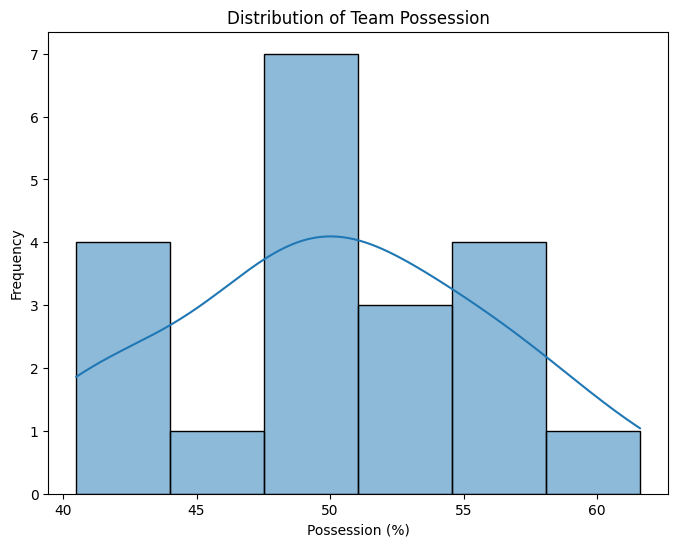

In [ ]:
# EDA (Exploratory Data Analysis)
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Distribution of a relevant variable, e.g., 'possession'
# If 'Outcome' refers to a different dataset, this part should be replaced with analysis relevant to 'df'
# Assuming you want to see the distribution of the 'possession' column
print("\nDistribution of Possession:")
# For a numerical column like 'possession', a histogram or box plot is more appropriate than value_counts and countplot
# print(df['Outcome'].value_counts()) # This caused the error
# sns.countplot(x='Outcome', data=df) # This caused the error

# Let's visualize the distribution of 'possession' instead
plt.figure(figsize=(8, 6))
sns.histplot(x='possession', data=df, kde=True)
plt.title('Distribution of Team Possession') # Updated title
plt.xlabel('Possession (%)')
plt.ylabel('Frequency')
plt.show()

# If 'Outcome' was meant to be a categorical outcome related to team performance,
# you would need to add or create that column in your df DataFrame
# based on other available data or criteria.

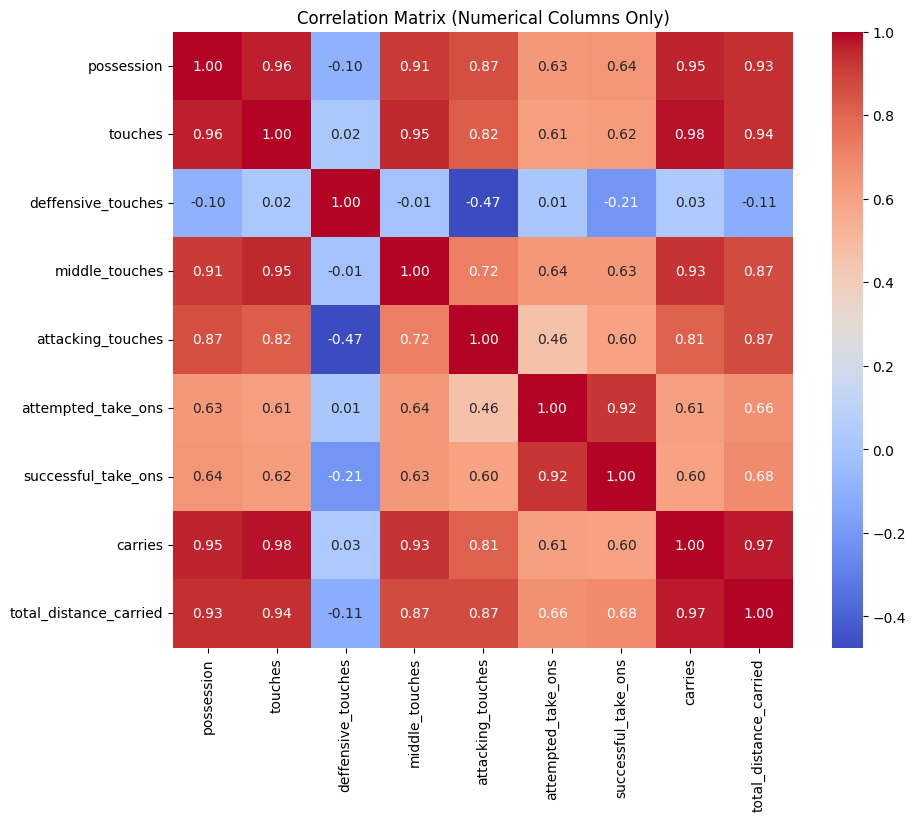

In [ ]:
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

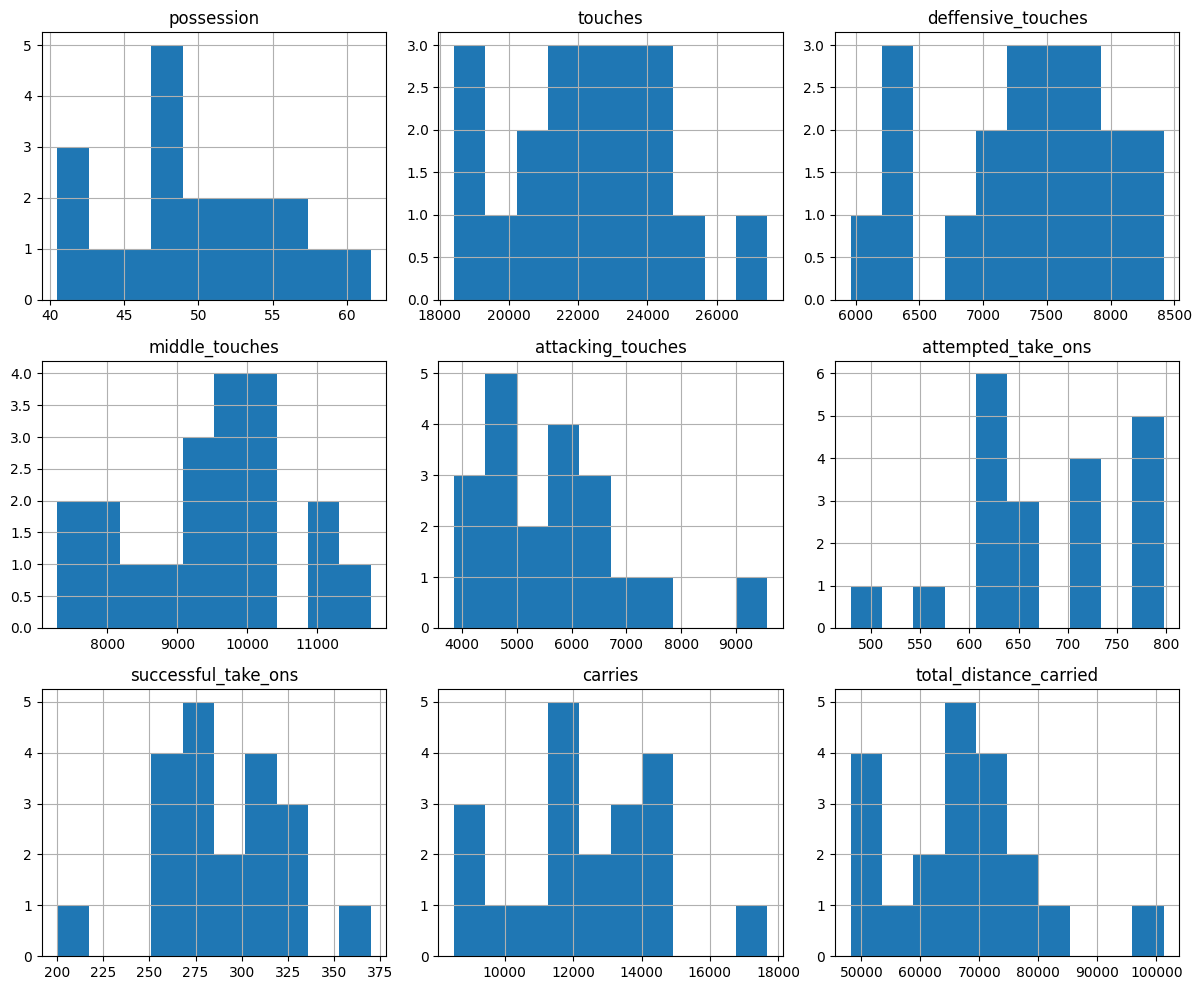

In [ ]:
# Histograms of features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


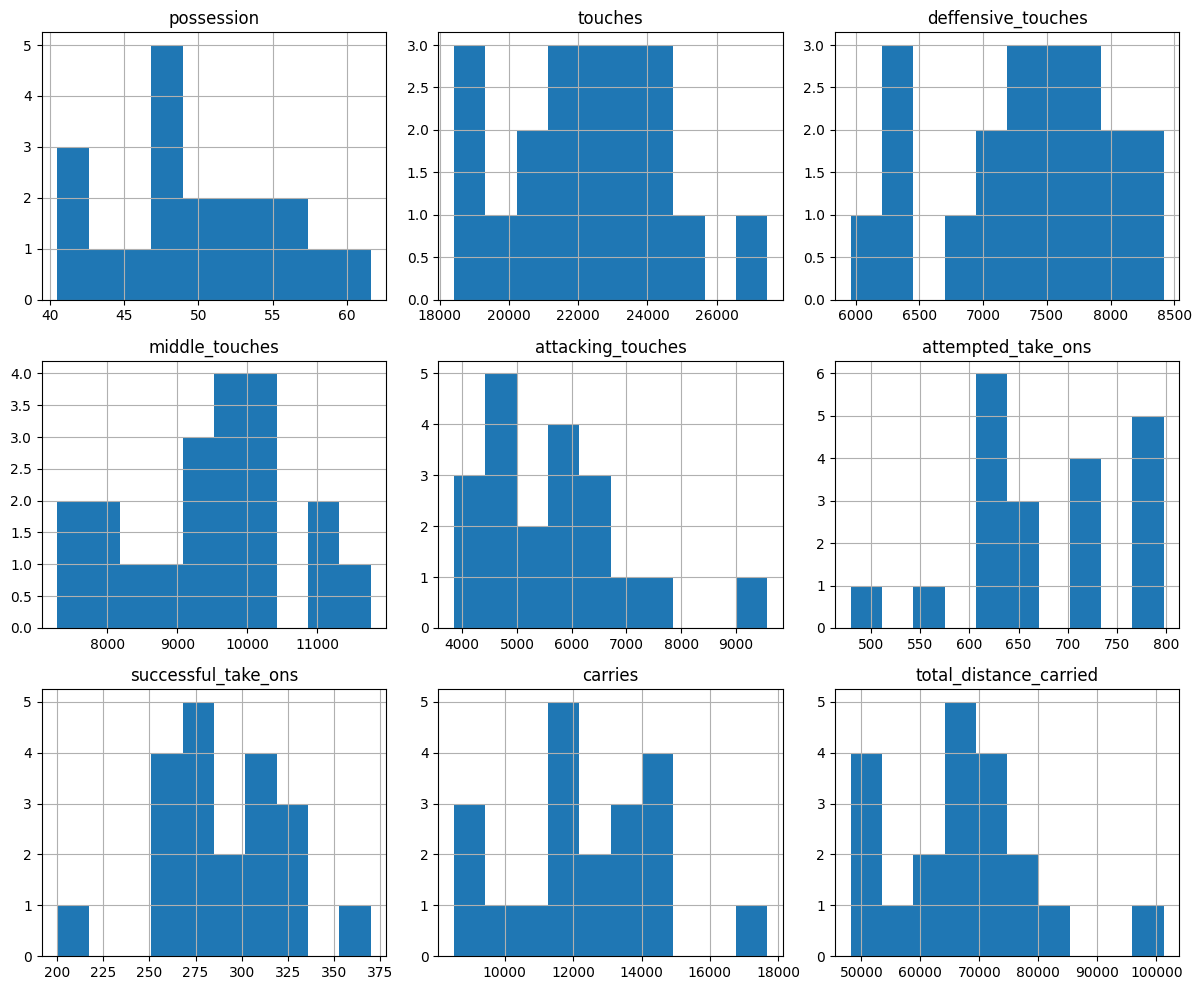

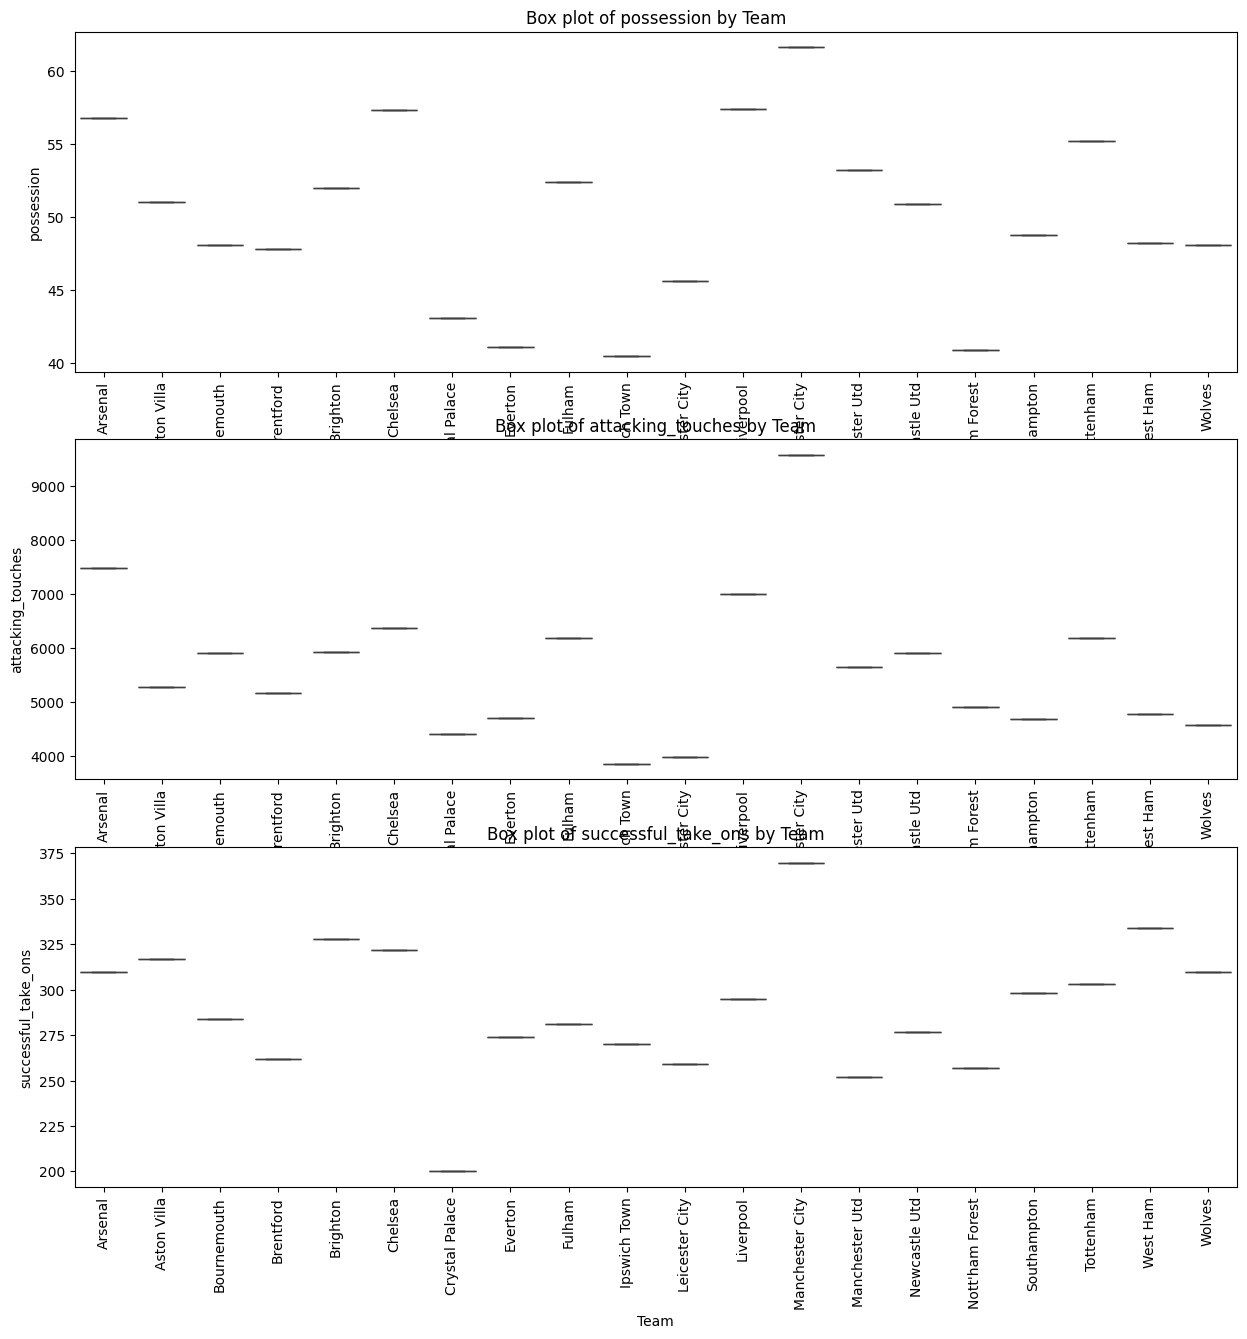

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots of numerical features by 'team'
# The original code attempted to use 'Outcome', which is not in this df.
# We will instead plot some numerical columns grouped by 'team'.
# You can select specific columns or iterate through numerical columns if desired.
cols_to_plot_by_team = ['possession', 'attacking_touches', 'successful_take_ons'] # Example columns

plt.figure(figsize=(15, 5 * len(cols_to_plot_by_team)))

for i, col in enumerate(cols_to_plot_by_team):
    if col in df.columns and 'team' in df.columns:
        plt.subplot(len(cols_to_plot_by_team), 1, i + 1) # Adjust subplot layout if needed
        sns.boxplot(x='team', y=col, data=df)
        plt.title(f'Box plot of {col} by Team')
        plt.xlabel('Team')
        plt.ylabel(col)
        plt.xticks(rotation=90) # Rotate team names for readability
    else:
        print(f"Column '{col}' or 'team' not found in df. Skipping plot for {col}.")

=== Logistic Regression Model Summary ===
Intercept (alpha): -0.0757
Coefficient for deffensive_touches (beta_1): -0.0024
Coefficient for middle_touches (beta_2): -0.0013
Coefficient for attacking_touches (beta_3): -0.0019
Coefficient for successful_take_ons (beta_4): -0.0683
Coefficient for total_distance_carried (beta_5): 0.0009

Decision Boundary (log-odds = 0):
-0.08 + -0.00·deffensive_touches + -0.00·middle_touches + -0.00·attacking_touches + -0.07·successful_take_ons + 0.00·total_distance_carried = 0


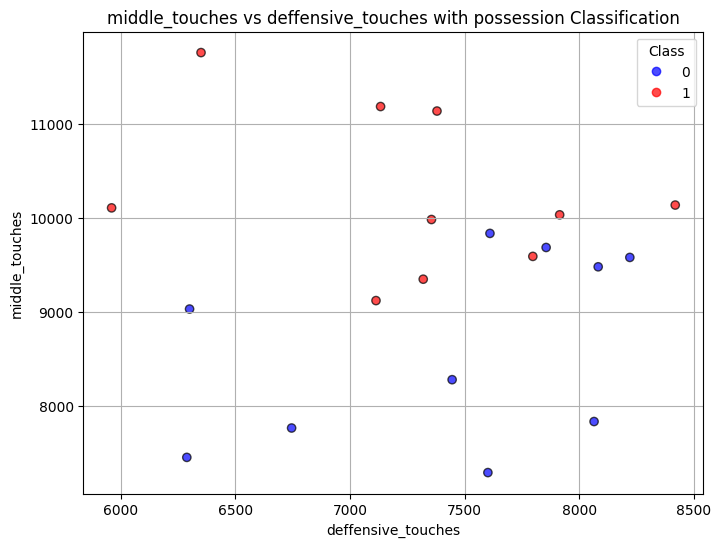


Model Accuracy: 95.00%

Model Accuracy (on training data): 0.9500

Classification Report (on training data):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix (on training data):
[[ 9  1]
 [ 0 10]]


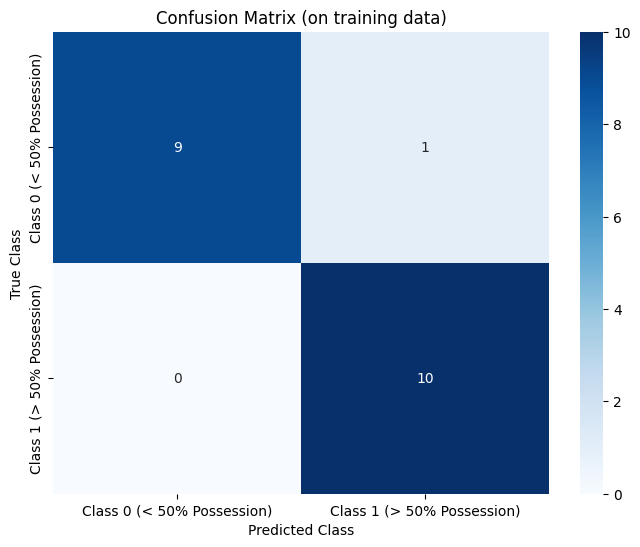


--- End of Model Evaluation ---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit as sigmoid  # for numeric stability

# 1. Load dataset
df = pd.read_csv("team_possession_stats.csv")  # Replace with your actual file

# 2. Select relevant columns
columns = ['deffensive_touches', 'middle_touches','attacking_touches','successful_take_ons','total_distance_carried']
target_column = 'possession'

# 3. Data cleaning
df['successful_take_ons'].fillna(df['successful_take_ons'].mean(), inplace=True)
df['deffensive_touches'].fillna(df['deffensive_touches'].mean(), inplace=True)
df['middle_touches'].fillna(df['middle_touches'].mode()[0], inplace=True)
df['attacking_touches'].fillna(df['attacking_touches'].mode()[0], inplace=True)
df['total_distance_carried'].fillna(df['total_distance_carried'].mode()[0], inplace=True)

# 4. Prepare features and target
X = df[columns].values

# Convert the continuous 'possession' to a binary target
# Example: Classify teams with possession > 50 as 1, otherwise 0
possession_threshold = 50.0
y = (df[target_column] > possession_threshold).astype(int).values # Convert to integer labels (0 or 1)


# 5. Fit logistic regression
model = LogisticRegression(fit_intercept=True)
model.fit(X, y)

# 6. Extract model parameters
alpha = model.intercept_[0]
beta = model.coef_[0]

# 7. Print summary
print("=== Logistic Regression Model Summary ===")
print(f"Intercept (alpha): {alpha:.4f}")
for i, b in enumerate(beta):
    print(f"Coefficient for {columns[i]} (beta_{i+1}): {b:.4f}")

# 8. Show log-odds = 0 boundary equation
boundary_terms = [f"{b:.2f}·{columns[i]}" for i, b in enumerate(beta)]
boundary_eq = f"{alpha:.2f} + " + " + ".join(boundary_terms) + " = 0"
print("\nDecision Boundary (log-odds = 0):")
print(boundary_eq)

# 9. Optional 2D visualization (using age and fare)
# Note: This visualization still uses the first two features.
# Adjust indices if you want to visualize different features.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel(columns[0]) # Use actual column name for x-axis label
plt.ylabel(columns[1]) # Use actual column name for y-axis label
plt.title(f'{columns[1]} vs {columns[0]} with {target_column} Classification') # More descriptive title
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()

# 10. Model Evaluation - Accuracy
accuracy = model.score(X, y)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
# --- Model Evaluation ---

# Predict on the data that was used for training
# (Remember: Evaluating on training data gives an optimistic view)
y_pred = model.predict(X) # Use X (all features) to get predictions

# Calculate Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nModel Accuracy (on training data): {accuracy:.4f}")

# Generate Classification Report
# This report includes Precision, Recall, F1-score, and Support for each class
print("\nClassification Report (on training data):")
print(classification_report(y, y_pred))

# Generate Confusion Matrix
# This shows the counts of True Positives, True Negatives, False Positives, and False Negatives
cm = confusion_matrix(y, y_pred)

print("\nConfusion Matrix (on training data):")
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
# Assuming your binary classes are 0 and 1, you can label the axes accordingly.
# If your target variable y has specific string labels ('Low', 'High'), use those instead.
# For the binary case (0 and 1):
class_labels = ['Class 0 (< 50% Possession)', 'Class 1 (> 50% Possession)'] # Adjust labels if needed

# You can also get labels from the model if it was trained on categorical strings,
# but here we converted to 0 and 1, so manual labels are appropriate.
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (on training data)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print("\n--- End of Model Evaluation ---")